In [ ]:
#Paso 1: En Readme.md


In [ ]:
#Paso 2: Obtencion y carga del conjunto de datos

In [8]:
import sqlite3
import pandas as pd

df = pd.read_csv('/workspaces/Fases-del-sue-o/data/mental_health_data final data.csv')
print(df.head())



   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes      NaN                  Yes          Low   
1                      No      Low                   No          Low   
2                      No      NaN                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes      NaN                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8          74                  

In [9]:
# Conectar a la base de datos SQLite
conn = sqlite3.connect('mental_health.db')

# Almacenar los datos en la base de datos SQLite en una tabla llamada 'health_data'
df.to_sql('health_data', conn, if_exists='replace', index=False)
print("Datos cargados correctamente en la base de datos SQLite.")


Datos cargados correctamente en la base de datos SQLite.


In [ ]:
#Paso 3: Almacenar la información

In [ ]:
#Ver 5 primeras filas
query = "SELECT * FROM health_data LIMIT 5"
df_from_db = pd.read_sql(query, conn)
print(df_from_db)


   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes     None                  Yes          Low   
1                      No      Low                   No          Low   
2                      No     None                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes     None                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8          74                  

In [ ]:
#Cuantas personas tienen alguna condicion mental
query = "SELECT Mental_Health_Condition, COUNT(*) FROM health_data GROUP BY Mental_Health_Condition"
df_mental_health_count = pd.read_sql(query, conn)
print(df_mental_health_count)


  Mental_Health_Condition  COUNT(*)
0                      No     25003
1                     Yes     24997


In [12]:
#Horas de sueño por nivel de estrés
query = "SELECT Stress_Level, AVG(Sleep_Hours) FROM health_data GROUP BY Stress_Level"
df_sleep_by_stress = pd.read_sql(query, conn)
print(df_sleep_by_stress)


  Stress_Level  AVG(Sleep_Hours)
0         High          7.040672
1          Low          6.994017
2       Medium          6.994990


In [13]:
#Ocupaciones de personas con condicion de salud mental
query = """
SELECT Occupation, Mental_Health_Condition, COUNT(*)
FROM health_data
GROUP BY Occupation, Mental_Health_Condition
"""
df_occupation_mental_health = pd.read_sql(query, conn)
print(df_occupation_mental_health)


     Occupation Mental_Health_Condition  COUNT(*)
0     Education                      No      3459
1     Education                     Yes      3630
2   Engineering                      No      3542
3   Engineering                     Yes      3530
4       Finance                      No      3593
5       Finance                     Yes      3693
6    Healthcare                      No      3550
7    Healthcare                     Yes      3555
8            IT                      No      3667
9            IT                     Yes      3614
10        Other                      No      3624
11        Other                     Yes      3488
12        Sales                      No      3568
13        Sales                     Yes      3487


In [ ]:
#PASO 4 EDA

In [14]:
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


In [16]:
df.columns = [
    'ID_Usuario', 'Edad', 'Género', 'Ocupación', 'País', 'Condición_Salud_Mental', 
    'Severidad', 'Historial_Consulta', 'Nivel_Estrés', 'Horas_Sueño', 'Horas_Trabajo', 
    'Horas_Actividad_Física', 'Uso_Redes_Sociales', 'Calidad_Dieta', 'Hábito_Fumar', 
    'Consumo_Alcohol', 'Uso_Medicación'
]

print(df.head())


   ID_Usuario  Edad             Género    Ocupación       País  \
0           1    36               Male    Education  Australia   
1           2    48               Male  Engineering      Other   
2           3    18  Prefer not to say        Sales      India   
3           4    30         Non-binary  Engineering  Australia   
4           5    58               Male           IT        USA   

  Condición_Salud_Mental Severidad Historial_Consulta Nivel_Estrés  \
0                    Yes       NaN                Yes          Low   
1                     No       Low                 No          Low   
2                     No       NaN                Yes       Medium   
3                     No    Medium                 No          Low   
4                    Yes       NaN                Yes         High   

   Horas_Sueño  Horas_Trabajo  Horas_Actividad_Física  Uso_Redes_Sociales  \
0          7.6             46                       8                 2.2   
1          6.8             7

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Usuario              50000 non-null  int64  
 1   Edad                    50000 non-null  int64  
 2   Género                  50000 non-null  object 
 3   Ocupación               50000 non-null  object 
 4   País                    50000 non-null  object 
 5   Condición_Salud_Mental  50000 non-null  object 
 6   Severidad               24998 non-null  object 
 7   Historial_Consulta      50000 non-null  object 
 8   Nivel_Estrés            50000 non-null  object 
 9   Horas_Sueño             50000 non-null  float64
 10  Horas_Trabajo           50000 non-null  int64  
 11  Horas_Actividad_Física  50000 non-null  int64  
 12  Uso_Redes_Sociales      50000 non-null  float64
 13  Calidad_Dieta           50000 non-null  object 
 14  Hábito_Fumar            50000 non-null

In [21]:
#La columna Severidad tiene muchos nulos
df=df.drop(columns=['Severidad'])


In [ ]:
#No aporta nada
df = df.drop(columns=['ID_Usuario'])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edad                    50000 non-null  int64  
 1   Género                  50000 non-null  object 
 2   Ocupación               50000 non-null  object 
 3   País                    50000 non-null  object 
 4   Condición_Salud_Mental  50000 non-null  object 
 5   Historial_Consulta      50000 non-null  object 
 6   Nivel_Estrés            50000 non-null  object 
 7   Horas_Sueño             50000 non-null  float64
 8   Horas_Trabajo           50000 non-null  int64  
 9   Horas_Actividad_Física  50000 non-null  int64  
 10  Uso_Redes_Sociales      50000 non-null  float64
 11  Calidad_Dieta           50000 non-null  object 
 12  Hábito_Fumar            50000 non-null  object 
 13  Consumo_Alcohol         50000 non-null  object 
 14  Uso_Medicación          50000 non-null

In [32]:
#Revisar subniveles (opciones) de las columnas 
columnas_categoricas=['Género','Ocupación','País','Condición_Salud_Mental','Historial_Consulta','Nivel_Estrés','Calidad_Dieta','Hábito_Fumar','Consumo_Alcohol','Uso_Medicación']

for col in columnas_categoricas:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Género: 4 subniveles
Columna Ocupación: 7 subniveles
Columna País: 7 subniveles
Columna Condición_Salud_Mental: 2 subniveles
Columna Historial_Consulta: 2 subniveles
Columna Nivel_Estrés: 3 subniveles
Columna Calidad_Dieta: 3 subniveles
Columna Hábito_Fumar: 4 subniveles
Columna Consumo_Alcohol: 4 subniveles
Columna Uso_Medicación: 2 subniveles


In [24]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for col in columnas_numericas:
        print(f'Columna {col}: {df[col].nunique()} subniveles')


Columna Edad: 48 subniveles
Columna Horas_Sueño: 61 subniveles
Columna Horas_Trabajo: 51 subniveles
Columna Horas_Actividad_Física: 11 subniveles
Columna Uso_Redes_Sociales: 56 subniveles


In [26]:
df.shape

(50000, 15)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.shape

(50000, 15)

/tmp/ipykernel_14653/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
/tmp/ipykernel_14653/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
/tmp/ipykernel_14653/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
/tmp/ipykernel_14653/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to

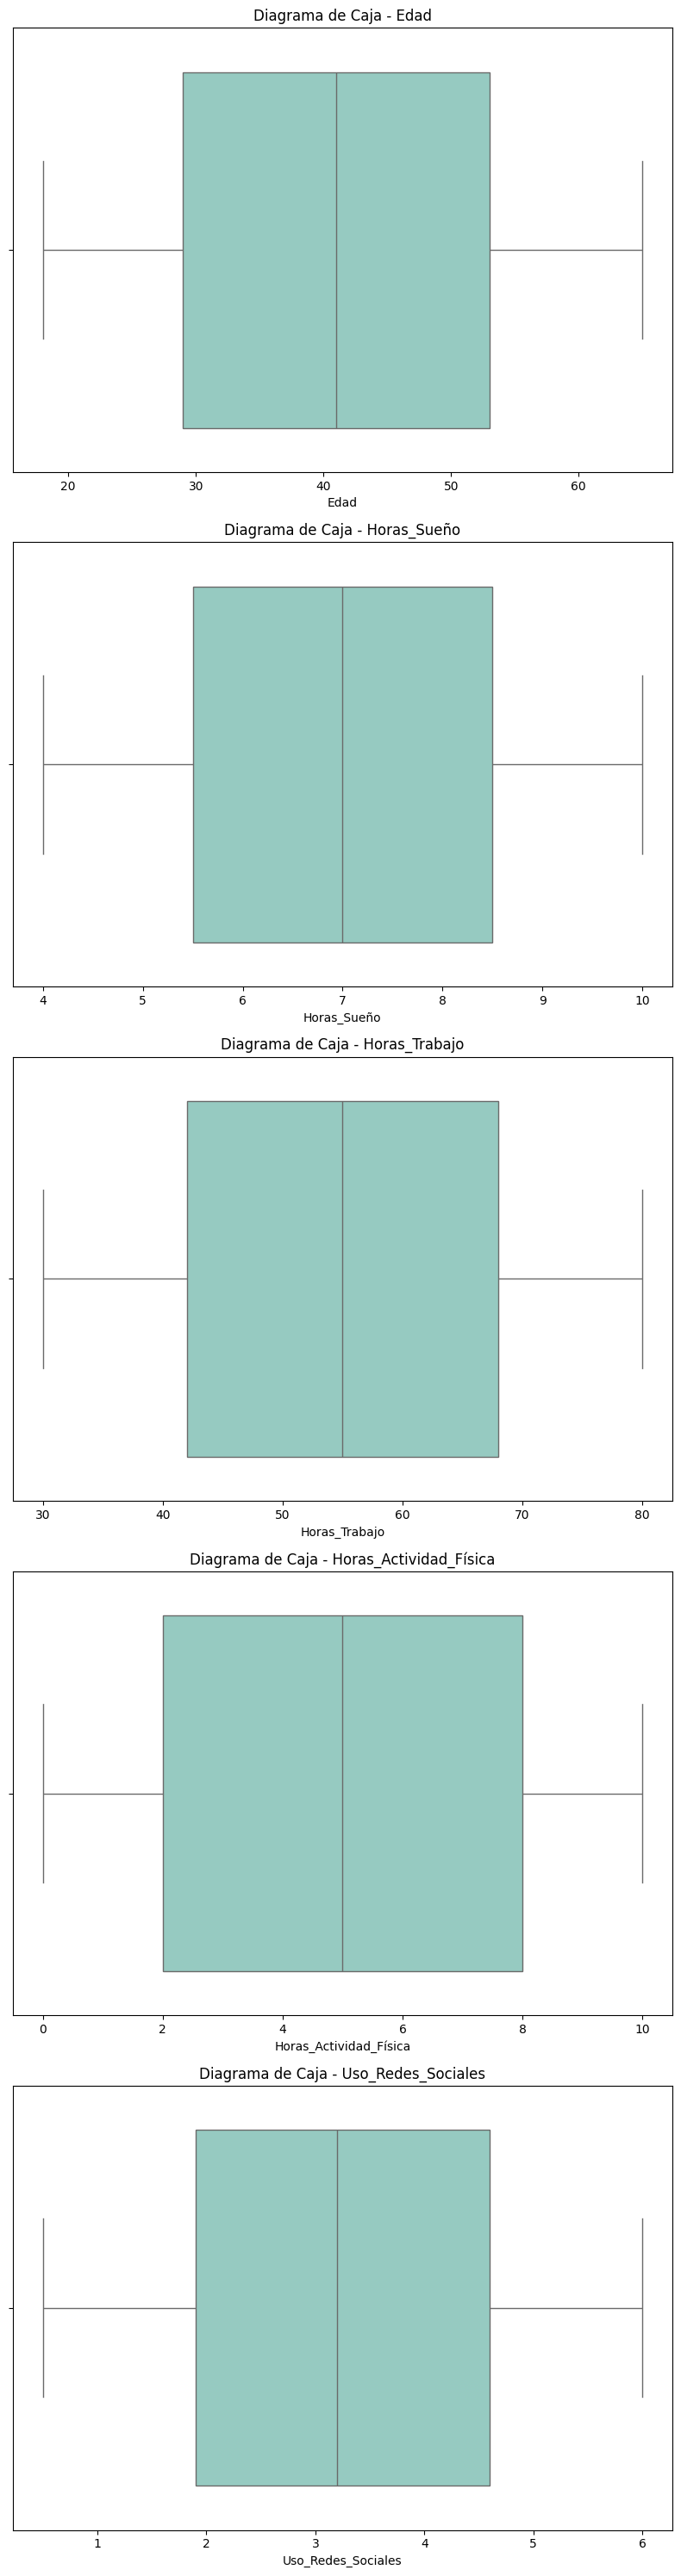

In [31]:
#Diagrama de Caja
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots(nrows=5,ncols=1,figsize=(8,30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
    ax[i].set_title(f'Diagrama de Caja - {col}', fontsize=12)


plt.tight_layout()
plt.show()



/tmp/ipykernel_14653/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_14653/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_14653/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_14653/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_14653/2749100429.py:6: UserWarning: set_ticklabels() should only be used with

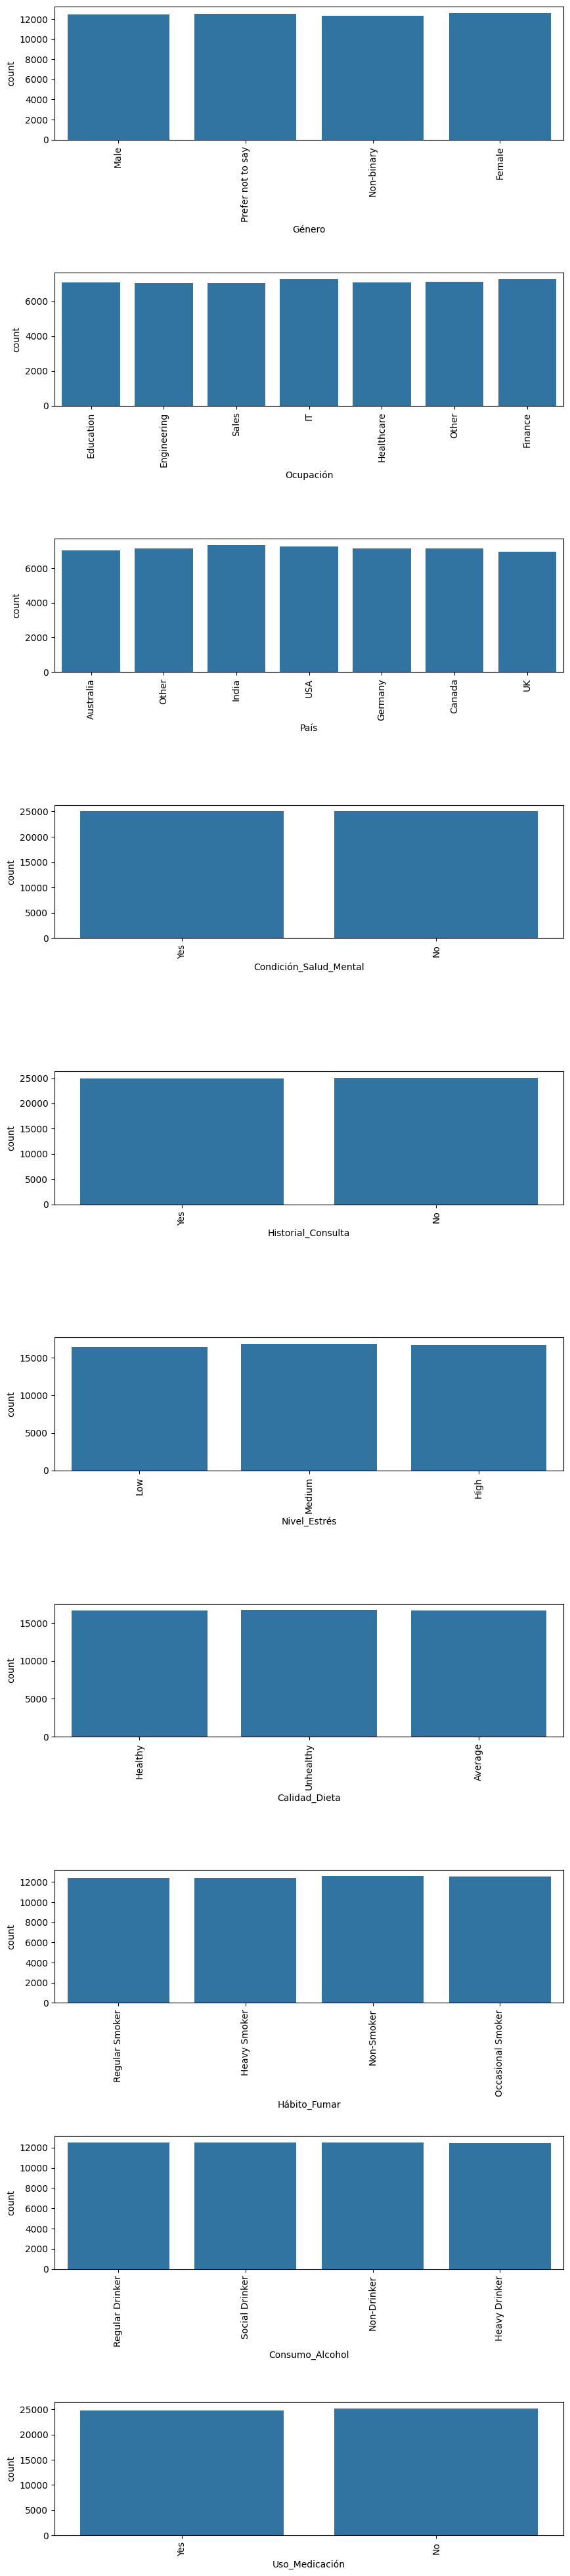

In [34]:
#Gráfico de barras
fig,ax=plt.subplots(nrows=10,ncols=1,figsize=(10,50))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col,data=df,ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [36]:
df.shape

(50000, 15)